In [15]:
import requests
import os
import datetime
import json
import pandas as pd
import mplfinance as mpf
import random
import time
import torch.nn.functional as F
import torch.nn as nn

In [3]:
uri = 'http://192.168.100.111:3334/macd'
headers = {'Content-Type': 'application/json'}

In [26]:
start = str(datetime.datetime(2021, 8, 1, 0, 0, 0, 0).timestamp()*1000).replace(".0", "")
end = str(datetime.datetime(2021, 8, 3, 0, 0, 0, 0).timestamp()*1000).replace(".0", "")

In [27]:
uri = f'{uri}?from={start}&to={end}&period=5'

In [28]:
result = requests.get(uri, headers=headers)
result

<Response [200]>

In [29]:
ticks = json.loads(result.text)['ticks']

In [203]:
data = {}
for tick in ticks:
    data[tick['timestamp']] = (float(tick['high']), float(tick['low']), float(tick['first']), float(tick['last']), datetime.datetime.fromtimestamp(float(tick['timestamp'])/1000))

In [204]:
df = pd.DataFrame.from_dict(data, orient='index', columns = ['High', 'Low', 'Open', 'Close', 'Timestamp'])

In [205]:
df['Timestamp']

1625955300000   2021-07-11 07:15:00
1625955600000   2021-07-11 07:20:00
1625955900000   2021-07-11 07:25:00
1625956200000   2021-07-11 07:30:00
1625956500000   2021-07-11 07:35:00
                        ...        
1626100500000   2021-07-12 23:35:00
1626100800000   2021-07-12 23:40:00
1626101100000   2021-07-12 23:45:00
1626101400000   2021-07-12 23:50:00
1626101700000   2021-07-12 23:55:00
Name: Timestamp, Length: 470, dtype: datetime64[ns]

In [206]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df.set_index('Timestamp', inplace=True)

In [211]:
df[190:200]

,High,Low,Open,Close
Timestamp,,,,
2021-07-11 23:35:00,3727059.0,3725228.0,3725228.0,3728258.0
2021-07-11 23:40:00,3729605.0,3727525.0,3728338.0,3734999.0
2021-07-11 23:45:00,3738188.0,3734185.0,3734718.0,3731600.0
2021-07-11 23:50:00,3732600.0,3730979.0,3730979.0,3733100.0
2021-07-11 23:55:00,3735254.0,3733617.0,3735254.0,3736336.0
2021-07-12 00:00:00,3739100.0,3735602.0,3735602.0,3732461.0
2021-07-12 00:05:00,3732462.0,3730001.0,3732462.0,3738017.0
2021-07-12 00:10:00,3738144.0,3737294.0,3737294.0,3739698.0
2021-07-12 00:15:00,3741911.0,3739000.0,3740000.0,3736320.0


In [212]:
df.to_csv('data/sample.csv')

Create DataFile and DataFrame

In [4]:
import pickle

In [3]:
def save_obj(obj, name ):
    with open('obj/'+ name + '.pkl', 'wb') as f:
        pickle.dump(obj, f, pickle.HIGHEST_PROTOCOL)
        
def load_obj(name ):
    with open('obj/' + name + '.pkl', 'rb') as f:
        return pickle.load(f)
    
def save_dict_to_file(obj, name):
    f = open('obj/' + name,'w')
    f.write(str(obj))
    f.close()

def load_dict_from_file(name):
    f = open('obj/'+name,'r')
    data=f.read()
    f.close()
    return eval(data)

In [10]:
uri = 'http://192.168.100.111:3334/macd'
headers = {'Content-Type': 'application/json'}
period = "1"

In [7]:
year = 2017
month = 7
day = 5

startDate = datetime.datetime(year, month, day, 0, 0, 0, 0)
endDate = startDate + datetime.timedelta(days=1)
start = str(startDate.timestamp()*1000).replace(".0", "")
end = str(endDate.timestamp()*1000).replace(".0", "")

data = {}

In [8]:
retry = False
while startDate.year != 2022:
    time.sleep(0.3)
    if retry == False:
        startDate = startDate + datetime.timedelta(days=1)
        endDate = startDate + datetime.timedelta(days=1)
        start = str(startDate.timestamp()*1000).replace(".0", "")
        end = str(endDate.timestamp()*1000).replace(".0", "")
    retry = False
    query = f'{uri}?from={start}&to={end}&period={period}'
    result = requests.get(query, headers=headers)
    if result.status_code == requests.codes.ok and len(result.text) > 3:
        ticks = json.loads(result.text)['ticks']
        for tick in ticks:
            data[tick['timestamp']] = (float(tick['high']), float(tick['low']), float(tick['first']), float(tick['last']), datetime.datetime.fromtimestamp(float(tick['timestamp'])/1000))
            if startDate.month != month:
                month = startDate.month
                #save_dict_to_file(data, f'candle_{startDate.year}-{startDate.month}_temp')
    else:
        print(f'Connection Failed: {result.status_code}, content:{result.text}')
        retry = True
        if result.status_code == requests.codes.ok:
            retry = False

In [9]:
df = pd.DataFrame.from_dict(data, orient='index', columns = ['High', 'Low', 'Open', 'Close', 'Timestamp'])
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df.set_index('Timestamp', inplace=True)

In [10]:
df

,High,Low,Open,Close
Timestamp,,,,
2017-07-10 00:00:00,290940.0,290630.0,290724.0,290639.0
2017-07-10 00:05:00,290916.0,290000.0,290639.0,290384.0
2017-07-10 00:10:00,290179.0,289500.0,290038.0,289701.0
2017-07-10 00:15:00,289962.0,289500.0,289701.0,289500.0
2017-07-10 00:20:00,290100.0,289391.0,289447.0,289700.0
...,...,...,...,...
2021-10-30 22:30:00,7042000.0,7023032.0,7026114.0,7041284.0
2021-10-30 22:35:00,7090138.0,7039645.0,7039939.0,7077687.0
2021-10-30 22:40:00,7095268.0,7052170.0,7080000.0,7052170.0


In [5]:
df.to_csv('../data/common/bitcoin_5_2017-07-10 00:00:00-2021-10-30 22:50:00.csv')

NameError: name 'df' is not defined

In [6]:
df = pd.read_csv('../data/common/bitcoin_5_2017-07-10 00:00:00-2021-10-30 22:50:00.csv', index_col='Timestamp', parse_dates=True)

In [7]:
len(df)

1906190

In [11]:
df

,High,Low,Open,Close
Timestamp,,,,
2017-07-10 00:00:00,290940.0,290630.0,290724.0,290639.0
2017-07-06 00:01:00,289530.0,289290.0,289360.0,289290.0
2017-07-06 00:02:00,289519.0,289140.0,289519.0,289140.0
2017-07-06 00:03:00,289169.0,288920.0,289140.0,288920.0
2017-07-06 00:04:00,289200.0,288920.0,288920.0,288998.0
...,...,...,...,...
2021-11-05 00:57:00,6954999.0,6946181.0,6949239.0,6947642.0
2021-11-05 00:58:00,6955457.0,6947035.0,6947921.0,6954422.0
2021-11-05 00:59:00,6954815.0,6950000.0,6954815.0,6951231.0


In [14]:
df.to_csv('temp.csv')

/home/sato/python/torch/lib/python3.8/site-packages/mplfinance/_arg_validators.py:35: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+


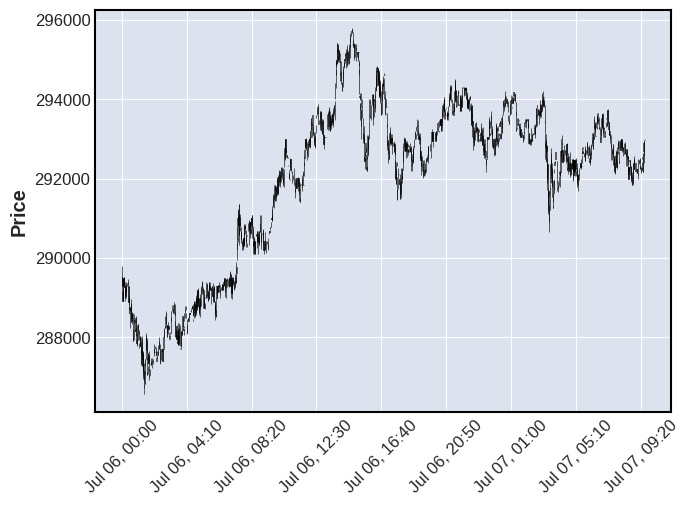

In [12]:
mpf.plot(df[0:12*24*7], type='candle')

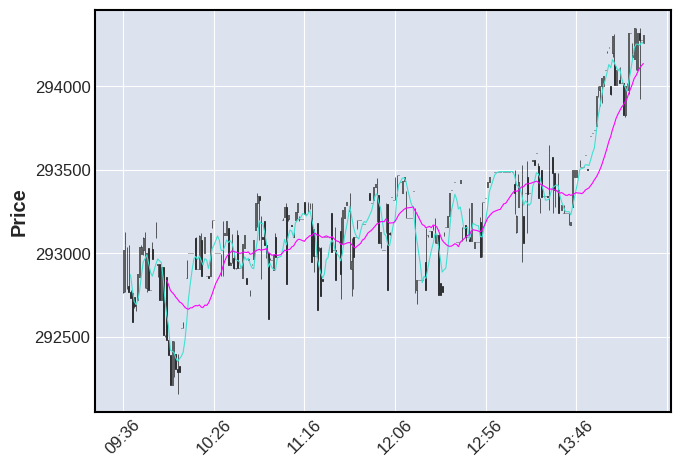

In [100]:
mpf.plot(df[12*24:12*24+12*24], type='candle', mav=(4, 25))

In [106]:
#targetDf = df[12*24*7-5:12*24*7+12*24]
targetDf = df[0:-1]
meanArray = []
mean5Array = []
trend = 0
boaders = []
interval = 4

for index, row in targetDf.iterrows():
    #currentMean = (row.High + row.Low)/2
    currentMean = row.Close
    meanArray.append(currentMean)

for mean in meanArray:
    index = len(mean5Array)
    if index > interval:
        mean5Value = 0
        for value in meanArray[index-interval+1:index+1]:
            mean5Value += value
        mean5Value = mean5Value/interval
        last5Value = mean5Array[-1]
        diff = mean5Value - last5Value
        mean5Array.append(mean5Value)
        if diff > 0:
            if trend == -1:
                #boaders.append(([targetDf[index-1:index].index[0]] ,targetDf.iloc[index-1].Close))
                boaders.append(([targetDf[index:index+1].index[0]] ,mean5Array[index-1]))
            trend = 1
        else:
            if trend == 1:
                #boaders.append(([targetDf[index-1:index].index[0]] ,targetDf.iloc[index-1].Close))
                boaders.append(([targetDf[index:index+1].index[0]] ,mean5Array[index-1]))
            trend = -1
    else:
        mean5Array.append(mean)

In [108]:
currentBoaderIndex = 0
nextBoaderValues = []
ended = False
for index, row in targetDf.iterrows():
    if index <= boaders[currentBoaderIndex][0][0]:
        nextBoaderValues.append(boaders[currentBoaderIndex][1])
    else:
        while index > boaders[currentBoaderIndex][0][0]:
            if currentBoaderIndex < len(boaders)-1:
                currentBoaderIndex += 1
            else:
                ended = True
                break;
        if ended is True:
            nextBoaderValues.append(-1)
        else:
            nextBoaderValues.append(boaders[currentBoaderIndex][1])

In [109]:
targetDf['BoaderValue'] = nextBoaderValues

/home/cow/.pyenv/versions/3.6.8/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [110]:
targetDf

,High,Low,Open,Close,BoaderValue
Timestamp,,,,,
2017-07-10 00:00:00,290940.0,290630.0,290724.0,290639.0,290501.00
2017-07-10 00:05:00,290916.0,290000.0,290639.0,290384.0,290501.00
2017-07-10 00:10:00,290179.0,289500.0,290038.0,289701.0,290501.00
2017-07-10 00:15:00,289962.0,289500.0,289701.0,289500.0,290501.00
2017-07-10 00:20:00,290100.0,289391.0,289447.0,289700.0,290501.00
...,...,...,...,...,...
2021-10-30 22:25:00,7027045.0,6999618.0,6999999.0,7026000.0,7011743.75
2021-10-30 22:30:00,7042000.0,7023032.0,7026114.0,7041284.0,7049285.25
2021-10-30 22:35:00,7090138.0,7039645.0,7039939.0,7077687.0,7049285.25


In [113]:
targetDf.to_csv('../data/input/bitcoin_boader_5_mean4.csv')

# Create Boader Data

In [115]:
targetDf = pd.read_csv('../data/input/bitcoin_boader_5_mean4.csv', index_col='Timestamp', parse_dates=True)

In [116]:
dataFrame = targetDf.copy().sort_index()

In [19]:
# caliculate
data = {}
SPAN=30
Interval = 5
for index in range(0, len(dataFrame)-3):
    if dataFrame[index+1:index+2].index[0] - dataFrame[index:index+1].index[0] > datetime.timedelta(minutes=SPAN):
        missingCount = (dataFrame[index+1:index+2].index[0] - dataFrame[index:index+1].index[0])/datetime.timedelta(minutes=Interval)
        for count in range(0, int(missingCount)-1):
            timestamp = dataFrame[index:index+1].index[0]+ datetime.timedelta(minutes=Interval)
            if dataFrame[index:index+1].Close.values[0] > dataFrame[index+1:index+2].Open.values[0]:
                diff = (dataFrame[index:index+1].Close.values[0] - dataFrame[index+1:index+2].Open.values[0])/missingCount
                openValue = dataFrame[index:index+1].Close.values[0] - diff * count
                closeValue = dataFrame[index:index+1].Close.values[0] - diff * (count+1)
                High = openValue * (1+abs(random.gauss(0, 0.0005)))
                Low = closeValue * (1-abs(random.gauss(0, 0.0005)))
            else:
                diff = (dataFrame[index+1:index+2].Open.values[0] - dataFrame[index:index+1].Close.values[0])/missingCount
                openValue = dataFrame[index:index+1].Close.values[0] + diff * count
                closeValue = dataFrame[index:index+1].Close.values[0] + diff * (count+1)
                High = closeValue * (1+abs(random.gauss(0, 0.0005)))
                Low = openValue * (1-abs(random.gauss(0, 0.0005)))
        data[timestamp] = [High, Low,openValue, closeValue, timestamp, dataFrame[index:index+1].BoaderValue.values[0]]
    else:
        continue

In [117]:
# add same value
data = {}
SPAN=30
Interval = 5
for index in range(0, len(dataFrame)-3):
    if dataFrame[index+1:index+2].index[0] - dataFrame[index:index+1].index[0] > datetime.timedelta(minutes=SPAN):
        missingCount = (dataFrame[index+1:index+2].index[0] - dataFrame[index:index+1].index[0])/datetime.timedelta(minutes=Interval)
        for count in range(0, int(missingCount)-1):
            timestamp = dataFrame[index:index+1].index[0]+ datetime.timedelta(minutes=Interval)
            openValue = dataFrame[index:index+1].Open.values[0]
            closeValue = dataFrame[index:index+1].Close.values[0]
            High = dataFrame[index:index+1].High.values[0]
            Low = dataFrame[index:index+1].Low.values[0]
            data[timestamp] = [High, Low,openValue, closeValue, timestamp, dataFrame[index:index+1].BoaderValue.values[0]]
    else:
        continue

In [118]:
df = pd.DataFrame.from_dict(data, orient='index', columns = ['High', 'Low', 'Open', 'Close', 'Timestamp', 'BoaderValue'])
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df.set_index('Timestamp', inplace=True)

In [119]:
df

,High,Low,Open,Close,BoaderValue
Timestamp,,,,,
2017-11-06 17:30:00,845390.0,840666.0,844000.0,843997.0,839403.00
2017-11-18 20:45:00,839240.0,833300.0,839000.0,836962.0,837813.25
2017-12-15 12:40:00,1918042.0,1910182.0,1913001.0,1913001.0,1916146.75
2018-06-08 23:20:00,840038.0,839300.0,839551.0,839975.0,840359.25
2018-09-20 23:55:00,715500.0,715000.0,715500.0,715000.0,715386.00
2019-05-28 13:00:00,963213.0,957001.0,957229.0,962900.0,957853.75
2021-04-22 00:00:00,5989114.0,5959086.0,5962203.0,5989114.0,5971289.75
2021-06-23 23:00:00,3798722.0,3764476.0,3771000.0,3785411.0,3768764.50
2021-07-10 13:00:00,3728355.0,3720519.0,3726819.0,3723807.0,3726055.50


In [120]:
output = pd.concat([dataFrame, df], ignore_index=False).sort_index()
output

,High,Low,Open,Close,BoaderValue
Timestamp,,,,,
2017-07-10 00:00:00,290940.0,290630.0,290724.0,290639.0,290501.00
2017-07-10 00:05:00,290916.0,290000.0,290639.0,290384.0,290501.00
2017-07-10 00:10:00,290179.0,289500.0,290038.0,289701.0,290501.00
2017-07-10 00:15:00,289962.0,289500.0,289701.0,289500.0,290501.00
2017-07-10 00:20:00,290100.0,289391.0,289447.0,289700.0,290501.00
...,...,...,...,...,...
2021-10-30 22:25:00,7027045.0,6999618.0,6999999.0,7026000.0,7011743.75
2021-10-30 22:30:00,7042000.0,7023032.0,7026114.0,7041284.0,7049285.25
2021-10-30 22:35:00,7090138.0,7039645.0,7039939.0,7077687.0,7049285.25


In [121]:
output.to_csv('../data/input/bitcoin_boader_5_mean_filled15.csv')

# Create DataLoader

In [2]:
import numpy as np
import pandas as pd
import datetime

In [3]:
output = pd.read_csv('../data_org/input/bitcoin_boader_5_mean_filled15.csv',  header=0, index_col=0, parse_dates=True)

In [4]:
type(output)

pandas.core.frame.DataFrame

In [5]:
INTERVAL_DAYS = 2
MINUTES_SPAN = 5

totalMinutes = INTERVAL_DAYS * 24 * 60
span  = int(totalMinutes/MINUTES_SPAN)
span

576

In [6]:
output = output.sort_index()

In [7]:
dataHigh = np.empty((0, span+1), float)

In [8]:
index=1

In [9]:
maxValue = output[index:index+span+1].High.values.max()

In [10]:
dataHigh = np.append(dataHigh, np.array([output[index:index+span+1].High.values/maxValue]), axis=0)

In [19]:
np.array([output[0:0+span+1].BoaderValue.values/maxValue])

array([[0.04047733, 0.04047733, 0.04047733, 0.04047733, 0.04047733,
        0.04047733, 0.04047733, 0.04047733, 0.04047733, 0.04047733,
        0.04047733, 0.04046828, 0.04052944, 0.04052944, 0.04052944,
        0.04052944, 0.04052944, 0.04051885, 0.04052338, 0.04035911,
        0.04035911, 0.04035911, 0.04035911, 0.04035911, 0.04035911,
        0.04035911, 0.04035911, 0.04035911, 0.04035911, 0.04035911,
        0.04037196, 0.04029087, 0.04029087, 0.04029087, 0.04029087,
        0.04029087, 0.04040157, 0.04040157, 0.04040157, 0.04040157,
        0.04040157, 0.04040157, 0.04040157, 0.04034782, 0.04034782,
        0.04034782, 0.04034782, 0.04037572, 0.04037572, 0.04037036,
        0.04046688, 0.04046688, 0.04046688, 0.04046688, 0.04046688,
        0.04046688, 0.04046688, 0.04046688, 0.04046688, 0.04042452,
        0.04042452, 0.04042452, 0.04042452, 0.04042452, 0.04050213,
        0.04050213, 0.04050213, 0.04050213, 0.04050213, 0.04050213,
        0.04050213, 0.04044995, 0.04044995, 0.04

In [20]:
count = 0
['High', 'Low', 'Open', 'Close','BoaderValue']
dataHigh = np.empty((0, span+1), float)
dataLow = np.empty((0, span+1), float)
dataOpen = np.empty((0, span+1), float)
dataClose = np.empty((0, span+1), float)
dataBoaderValue = np.empty((0, span+1), float)
#dataDateTime = []
currentProgress = -1

# create Array of arrayt which contain INTERVAL_DAYS candle info
for index in range(0, len(output) - span -2):
    progress = int((index/(len(output) - span -2))*100)
    if output[index+span:index+span+1].index[0] - output[index:index+1].index[0] == datetime.timedelta(days=INTERVAL_DAYS):
        maxValue = output[index:index+span+1].High.values.max()
        #dataHigh = np.append(dataHigh, np.array([output[index:index+span+1].High.values/maxValue]), axis=0)
        #dataLow = np.append(dataLow, np.array([output[index:index+span+1].Low.values/maxValue]), axis=0)
        #dataOpen = np.append(dataOpen, np.array([output[index:index+span+1].Open.values/maxValue]), axis=0)
        #dataClose = np.append(dataClose, np.array([output[index:index+span+1].Close.values/maxValue]), axis=0)
        dataBoaderValue = np.append(dataBoaderValue, np.array([output[index:index+span+1].BoaderValue.values/maxValue]), axis=0)
        #dataDateTime.append(output[index:index+span+1].index.values/maxValue)
    if currentProgress != progress:
        print(progress)
        currentProgress = progress

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99


In [18]:
np.save('../bc_boader_5_mean_2days_High_normalized.npy', dataHigh)

In [19]:
np.save('../bc_boader_5_mean_2days_Low_normalized.npy', dataLow)

In [20]:
np.save('../bc_boader_5_mean_2days_Open_normalized.npy', dataOpen)

In [21]:
np.save('../bc_boader_5_mean_2days_Close_normalized.npy', dataClose)

In [21]:
np.save('../bc_boader_5_mean_2days_BoaderValue_normalized.npy', dataBoaderValue)

In [16]:
dataBoaderValue

array([], shape=(0, 577), dtype=float64)

In [33]:
loaded_array = np.load('data/bc_boader_5_2days.npz')

INTERVAL_DAYS = 2
MINUTES_SPAN = 5

['High', 'Low', 'Open', 'Close','BoaderValue']
dataHigh = []
dataLow = []
dataOpen = []
dataClose = []
dataBoaderValue = []
dataTDateTime = []

dataFrame = output.sort_index()
skipIndex = -1

# create Array of arrayt which contain INTERVAL_DAYS candle info
for index in range(0, len(dataFrame)-3):
    print(index/(len(dataFrame)-3))
    currentData = []
    if index > skipIndex:
        skipIndex = -1
        for innerIndex in range(index,len(dataFrame)-3):
            # check if it doesn't over INTERVAL_DAYS
            if dataFrame[innerIndex:innerIndex+1].index[0] - dataFrame[index:index+1].index[0] < datetime.timedelta(days=INTERVAL_DAYS):
                # check if the diff of timestamp is less than span
                if dataFrame[innerIndex+1:innerIndex+2].index[0] - dataFrame[innerIndex:innerIndex+1].index[0] > datetime.timedelta(minutes=MINUTES_SPAN):
                    skipIndex = innerIndex
                    break
                else:
                    # add this row to currentData
                    rowData = dataFrame[innerIndex:innerIndex+1].values[0]
                    rowDataAppended = np.append(rowData, dataFrame[innerIndex:innerIndex+1].index[0])
                    currentData.append(rowDataAppended)
            else:
                # add currentData to Data. Then finish this loop
                data.append(currentData)
                break

df = pd.DataFrame(data)

df.to_csv('data/bc_boader_2days.csv')

In [ ]:
# fix low valus is not the min value: [251569. 250600. 250869. 251400. 250288.]

# Create Data from MilliSeconds

In [ ]:
not yet///

# 移動平均過去4

In [39]:
def EMA(df, interval=12):
    index = 0
    interval = 12
    meanValue = 0
    meanArray = []

    alpha = 2/(interval + 1)

    for date, row in df.iterrows():
        if index < interval:
            meanValue = meanValue + row.Close
            if(index == interval-1):
                meanValue = meanValue/interval
        else:
            meanValue = meanArray[-1] * (1- alpha) + row.Close*alpha
        meanArray.append(meanValue)
        index = index + 1
    return meanArray

In [45]:
result = EMA(df)

In [46]:
len(result)

378615

In [47]:
len(df)

378615

In [76]:
trend = 0
boaderValue = -1
boaders = []

for index in range(1, len(result)):
    diff = result[index] - result[index-1]
    if diff > 0:
        if trend == -1:
            boaderValue = df.iloc[index].Close
            boaders.append((df[index:index+1].index[0], boaderValue))
        trend = 1
    else:
        if trend == 1:
            boaderValue = df.iloc[index].Close
            boaders.append((df[index:index+1].index[0], boaderValue))
        trend = -1

In [77]:
currentBoaderIndex = 0
nextBoaderValues = []
ended = False
for index, row in df.iterrows():
    if index <= boaders[currentBoaderIndex][0]:
        nextBoaderValues.append(boaders[currentBoaderIndex][1])
    else:
        while index > boaders[currentBoaderIndex][0]:
            if currentBoaderIndex < len(boaders)-1:
                currentBoaderIndex += 1
            else:
                ended = True
                break;
        if ended is True:
            nextBoaderValues.append(-1)
        else:
            nextBoaderValues.append(boaders[currentBoaderIndex][1])

In [78]:
df['BoaderValue'] = nextBoaderValues

In [81]:
boaders

[(Timestamp('2017-07-10 00:55:00'), 290900.0),
 (Timestamp('2017-07-10 01:00:00'), 291000.0),
 (Timestamp('2017-07-10 01:35:00'), 290227.0),
 (Timestamp('2017-07-10 03:05:00'), 289723.0),
 (Timestamp('2017-07-10 03:30:00'), 289510.0),
 (Timestamp('2017-07-10 03:50:00'), 289811.0),
 (Timestamp('2017-07-10 04:00:00'), 289500.0),
 (Timestamp('2017-07-10 04:05:00'), 289840.0),
 (Timestamp('2017-07-10 04:55:00'), 289811.0),
 (Timestamp('2017-07-10 05:00:00'), 290263.0),
 (Timestamp('2017-07-10 05:55:00'), 290205.0),
 (Timestamp('2017-07-10 06:10:00'), 290441.0),
 (Timestamp('2017-07-10 06:30:00'), 290331.0),
 (Timestamp('2017-07-10 07:00:00'), 290330.0),
 (Timestamp('2017-07-10 07:05:00'), 289888.0),
 (Timestamp('2017-07-10 07:40:00'), 290351.0),
 (Timestamp('2017-07-10 08:20:00'), 290220.0),
 (Timestamp('2017-07-10 08:25:00'), 290533.0),
 (Timestamp('2017-07-10 08:35:00'), 290199.0),
 (Timestamp('2017-07-10 08:55:00'), 290429.0),
 (Timestamp('2017-07-10 09:45:00'), 290725.0),
 (Timestamp('

In [79]:
df

,High,Low,Open,Close,BoaderValue
Timestamp,,,,,
2017-07-10 00:00:00,290940.0,290630.0,290724.0,290639.0,290900.0
2017-07-10 00:05:00,290916.0,290000.0,290639.0,290384.0,290900.0
2017-07-10 00:10:00,290179.0,289500.0,290038.0,289701.0,290900.0
2017-07-10 00:15:00,289962.0,289500.0,289701.0,289500.0,290900.0
2017-07-10 00:20:00,290100.0,289391.0,289447.0,289700.0,290900.0
...,...,...,...,...,...
2021-10-30 22:30:00,7042000.0,7023032.0,7026114.0,7041284.0,7012596.0
2021-10-30 22:35:00,7090138.0,7039645.0,7039939.0,7077687.0,7012596.0
2021-10-30 22:40:00,7095268.0,7052170.0,7080000.0,7052170.0,7012596.0


## オーダー数を元にしたボーダー値の確率導出

# ミリ秒

In [2]:
import pandas as pd
import datetime
import requests
import os
import json
import random
import numpy as np

In [1]:
id_uri = 'http://192.168.100.113:9200/bitcoin.coincheck.order/_pit?keep_alive=5m'

In [150]:
year = 2019
month_from=7
month = month_from
day = 1
startDate = datetime.datetime(year, month, day, 9, 0, 0, 0)
endDate = startDate + datetime.timedelta(days=1)
start = str(startDate.timestamp()*1000).replace(".0", "")
end = str(endDate.timestamp()*1000).replace(".0", "")

In [151]:
search_uri = 'http://192.168.100.113:9200/_search'
headers = {'Content-Type': 'application/json'}

In [152]:
startDate.year

2019

In [153]:
retry = True
result = requests.post(id_uri)
_id_ = json.loads(result.text)['id']
dateData = []
buyRateData = []
buyAmountData = []
sellRateData = []
sellAmountData = []
currentDate =  datetime.datetime(year, month, day, 0, 0, 0, 0)
count = 0
buyCount = 0
sellCount = 0

while startDate.year == year:
    if retry == False:
        startDate = startDate + datetime.timedelta(days=1)
        endDate = startDate + datetime.timedelta(days=1)
        start = str(startDate.timestamp()*1000).replace(".0", "")
        end = str(endDate.timestamp()*1000).replace(".0", "")
    retry = False
    query = {
        "query": {
            "range":{
                "@timestamp": {
                    "time_zone": "+00:00",
                    "gte": start,
                    "lt": end
                }
            }
        },
        "pit": {
            "id":  _id_,
            "keep_alive": "5m"
        },
        "sort": [
            {"@timestamp": {"order": "asc", "format": "strict_date_optional_time_nanos"}}
        ],
        "track_total_hits": 'false',
        "size":10000
    }
    query = json.dumps(query)
    result = requests.post(search_uri, query, headers=headers)
    
    if result.status_code == requests.codes.ok and len(result.text) > 3:
        result = json.loads(result.text)
        for item in result['hits']['hits']:
            tick = item['_source']
            date = datetime.datetime.strptime(tick['@timestamp'], '%Y-%m-%dT%H:%M:%S.%fZ')
            date = date - datetime.timedelta(microseconds=date.microsecond)
            while currentDate < date:
                if sellCount > 1:
                    sellRateData[-1] = float(sellRateData[-1])/sellCount
                if buyCount > 1:
                    buyRateData[-1] = float(buyRateData[-1])/buyCount
                sellCount = 0
                buyCount = 0
                count = 0
                
                dateData.append(currentDate.timestamp())
                sellRateData.append(0)
                sellAmountData.append(0)
                buyRateData.append(0)
                buyAmountData.append(0)
                currentDate = currentDate + datetime.timedelta(seconds=1)
            if currentDate == date:
                if count > 0:
                    order = tick['order']
                    if order == "sell":
                        sellCount = sellCount +1
                        sellRateData[-1] = float(sellRateData[-1]) +   float(tick['rate'])
                        sellAmountData[-1] = float(sellAmountData[-1]) + float(tick['amount'])
                    elif order == "buy":
                        buyCount = buyCount +1
                        buyRateData[-1] = float(buyRateData[-1]) +   float(tick['rate'])
                        buyAmountData[-1] = float(buyAmountData[-1]) + float(tick['amount'])
                    else:
                        print(f'unexpected data: {order}')
                else:
                    dateData.append(currentDate.timestamp())
                    order = tick['order']
                    if order == "sell":
                        sellRateData.append(tick['rate'])
                        sellAmountData.append(tick['amount'])
                        buyRateData.append(0)
                        buyAmountData.append(0)
                        sellCount = sellCount + 1
                    elif order == "buy":
                        sellRateData.append(0)
                        sellAmountData.append(0)
                        buyRateData.append(tick['rate'])
                        buyAmountData.append(tick['amount'])
                        buyCount = buyCount + 1
                    else:
                        sellRateData.append(0)
                        sellAmountData.append(0)
                        buyRateData.append(0)
                        buyAmountData.append(0)
                        print(f'unexpected data: {order}')
                    count = count + 1
            else:
                print(f"1st line {currentDate}:{date}")
                
        while result['hits'] is not None and len(result['hits']['hits']) > 0:
            lastDate = result['hits']['hits'][-1]['sort']
            query = {
                "query": {
                    "range":{
                        "@timestamp": {
                            "time_zone": "+00:00",
                            "gte": start,
                            "lt": end
                        }
                    }
                },
                "pit": {
                    "id":  _id_,
                    "keep_alive": "1m"
                },
                "sort": [
                    {"@timestamp": {"order": "asc", "format": "strict_date_optional_time_nanos"}}
                ],
                "search_after": lastDate,
                "track_total_hits": 'false',
                "size":10000
            }
            query = json.dumps(query)
            result = requests.post(search_uri, query,headers=headers)
            result = json.loads(result.text)
            for item in result['hits']['hits']:
                tick = item['_source']
                date = datetime.datetime.strptime(tick['@timestamp'], '%Y-%m-%dT%H:%M:%S.%fZ')
                date = date - datetime.timedelta(microseconds=date.microsecond)
                while currentDate < date:
                    if sellCount > 1:
                        sellRateData[-1] = float(sellRateData[-1])/sellCount
                    if buyCount > 1:
                        buyRateData[-1] = float(buyRateData[-1])/buyCount
                    sellCount = 0
                    buyCount = 0
                    count = 0

                    dateData.append(currentDate.timestamp())
                    sellRateData.append(0)
                    sellAmountData.append(0)
                    buyRateData.append(0)
                    buyAmountData.append(0)
                    currentDate = currentDate + datetime.timedelta(seconds=1)
                if currentDate == date:
                    if count > 0:
                        order = tick['order']
                        if order == "sell":
                            sellCount = sellCount +1
                            sellRateData[-1] = float(sellRateData[-1]) +   float(tick['rate'])
                            sellAmountData[-1] = float(sellAmountData[-1]) + float(tick['amount'])
                        elif order == "buy":
                            buyCount = buyCount +1
                            buyRateData[-1] = float(buyRateData[-1]) +  float(tick['rate'])
                            buyAmountData[-1] = float(buyAmountData[-1]) + float(tick['amount'])
                        else:
                            print(f'unexpected data: {order}')
                    else:
                        dateData.append(currentDate.timestamp())
                        order = tick['order']
                        if order == "sell":
                            sellRateData.append(tick['rate'])
                            sellAmountData.append(tick['amount'])
                            buyRateData.append(0)
                            buyAmountData.append(0)
                            sellCount = sellCount + 1
                        elif order == "buy":
                            sellRateData.append(0)
                            sellAmountData.append(0)
                            buyRateData.append(tick['rate'])
                            buyAmountData.append(tick['amount'])
                            buyCount = buyCount + 1
                        else:
                            sellRateData.append(0)
                            sellAmountData.append(0)
                            buyRateData.append(0)
                            buyAmountData.append(0)
                            print(f'unexpected data: {order}')
                        count = count + 1
                else:
                    print(f"2nd line {currentDate}:{date}")
    else:
        print(f'Connection Failed: {result.status_code}, content:{result.text}')
        retry = True
        if result.status_code == requests.codes.ok:
            retry = False

In [154]:
eDate = datetime.datetime.fromtimestamp(dateData[-1])

IndexError: list index out of range

In [ ]:
f'bc_boader_2days_{year}-{month_from}-{day}_to_{eDate.year}-{eDate.month}-{eDate.day}.npy'

In [ ]:
data = {
    "date": dateData,
    "buy_rate":buyRateData,
    "buy_amount": buyAmountData,
    "sell_rate":sellRateData,
    "sell_amount": sellAmountData
}

In [ ]:
secData = pd.DataFrame.from_dict(data)

In [ ]:
secData.to_csv(f'bc_boader_2days_{year}-{month_from}-{day}_to_{eDate.year}-{eDate.month}-{eDate.day}.csv')